In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import numpy.ma as ma

In [24]:
#eq de onda en dos dimensiones diferencias finitas
#variables
puntos=30
segundos=60
c=1.0

#alfa menor o igual a 0.5 estabilidad
alfa=0.5

# dt
dx=1
dt=(alfa*dx*dx/c*c)
t=int(segundos/dt)

#matriz
mat=np.ones((puntos,puntos),dtype=float) 
matnew=np.ones((puntos,puntos),dtype=float)
#pprint.pprint(mat[0])
#print np.shape(mat[0])


In [27]:
#mascara 
for j in range(puntos):
    for k in range(puntos):
        if(j==0 or k==0 or j==puntos-1 or k==puntos-1 or j==int(puntos*2/3)):
            mat[j,k]=0
        if(j==puntos/3 and k==puntos/2):
            mat[j,k]=-0.5
        if((k>int((puntos)*3/7)) and (k<=int((puntos)*4/7)) and (j==int(puntos*2/3))):
            mat[j,k]=1
     

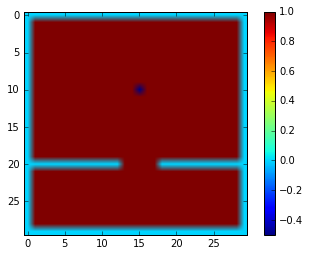

In [28]:
plt.imshow(mat)
plt.colorbar()
plt.show()
#np.shape(mat[0,:,:])

In [33]:
def primera(u_l_i_j,u_lm1_i_j,u_l_ip1_j,u_l_im1_j,u_l_i_jp1,u_l_i_jm1,alfa):
    return 2*u_l_i_j-u_lm1_i_j+alfa**2*(u_l_ip1_j+u_l_im1_j+u_l_i_jp1+u_l_i_jm1-4*u_l_i_j)

In [34]:
def u1(u_0_i_j,u_0_ip1_j,u_0_im1_j,u_0_i_jp1,u_0_i_jm1,alfa):
    return u_0_i_j+0.5*alfa**2*(u_0_ip1_j+u_0_im1_j+u_0_i_jp1+u_0_i_jm1-4*u_0_i_j)

In [32]:
u_1 = mat.copy()

In [35]:
#evolucion de u1
for i in range(0,puntos-1):
    for j in range(0,puntos-1):
        if((i!=0) and (j!=0) and (i!=puntos-1) and (j!=puntos-1) and (i!=int(2/3*puntos))):
            u_1[i,j]=u1(mat[i,j],mat[i+1,j],mat[i-1,j],mat[i,j+1],mat[i,j-1],alfa)
        if((j>int(puntos*3/7)) and (j<=int(puntos*4/7)) and (i==int(2/3*puntos))):
             u_1[i,j]=u1(mat[i,j],mat[i+1,j],mat[i-1,j],mat[i,j+1],mat[i,j-1],alfa)   

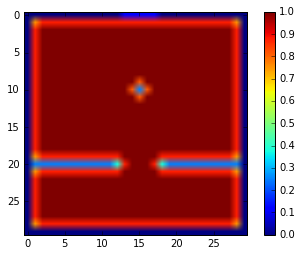

In [40]:
plt.imshow(u_1)
plt.colorbar()
plt.show()

#upast=np.copy(ut0)
#upresent=np.copy(ut1)
#ut1 es futuro

#condicion inicial
ut0=np.exp((-(x-0.3)**2)/0.01)
#print ut0
plt.plot(x,ut0)
plt.xlim(0,1)
plt.savefig("1.png")
plt.close()


ut0[0]=0
ut0[puntos-1]=0
ut1=np.zeros(puntos)
ut1[0]=0
ut1[puntos-1]=0


#primer punto
for i in range(1,puntos-1):
    ut1[i]=((gamma**2.0)/2.0)*(ut0[i+1]-2.0*ut0[i]+ut0[i-1])+ut0[i]
    
plt.plot(x,ut1)
plt.xlim(0,1)
plt.savefig("2.png")
plt.close()


upast=np.copy(ut0)
upresent=np.copy(ut1)
#ut1 es futuro


ntime=350
# movimiento
for j in range(ntime):
    for i in range(1,puntos-1):
        ut1[i]=(2.0*(1.0-gamma**2))*upresent[i]-upast[i]+(gamma**2)*(upresent[i+1]+upresent[i-1])

    upast=np.copy(upresent)
    upresent=np.copy(ut1)


plt.plot(x,ut0)
plt.plot(x,upresent)
plt.savefig("moviendose.png")
plt.close()